<a href="https://colab.research.google.com/github/djovan/Capstone-Project/blob/Dejan-Fred-Mike-Russ/StockPricePrediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experiment 1
This is experiment in using machine learning for stock closing price prediction. For prediction we will be constracting recurent neural network LSTM  using TensorFlow 2.0.

In [5]:
# Lets check if we have all packages installed, and if not lets install them
import pkg_resources
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
required = {'yfinance', 'pandas', 'math', 'numpy'}
missing = required - installedPackages
if missing:
    !pip install yfinance

     |████████████████████████████████| 5.5MB 6.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=c35ae7d929e677a61437e5844e6182c3a1d4e9e0ceb32c4556d4ffe71de18824
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [6]:
# Import libraries
import math
import numpy as np
import pandas as pd
import yfinance as yahoo 
import datetime as datetime
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras. layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

np.random.seed(777)

Get the selected stock data

In [7]:
data_source = 'yahoo'

if data_source == 'yahoo':
    yahoo.pdr_override()


In order to change which stock you want to use, update stocks[ ]. We first need to collect historical data in order to train our neural network. 

In [11]:
# download dataframes using pandas_datareader
def get_symbols(data_source, symbols, begin_date=None, end_date=None):
    out = pd.DataFrame()
    for symbol in symbols:
        df = web.DataReader(symbol, data_source, begin_date, end_date)
        df.head()
        df.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
        df['Ticker'] = symbol
        df['Date'] = pd.to_datetime(df.index, format='%Y-%m-%d')
        out = pd.concat([out, df], axis=0)
    return out

# start_date = datetime.date.today() - datetime.timedelta(60)
# end_date = datetime.date.today()

start_date = datetime.date(2010, 1, 1)
end_date = datetime.date.today()

stocks = ['AAPL']

print ("Start date:", start_date);
print ("End date:", end_date)

data = get_symbols(data_source, stocks, begin_date=start_date, end_date=end_date)

data.head()

Start date: 2010-01-01
End date: 2021-01-09


,Open,High,Low,Close,Volume,Adj Close,Ticker,Date
Date,,,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.593423,AAPL,2010-01-04
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.604822,AAPL,2010-01-05
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.499765,AAPL,2010-01-06
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.487749,AAPL,2010-01-07
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.530882,AAPL,2010-01-08


In [12]:
data.shape

(2774, 8)

Create the visualization of the data.

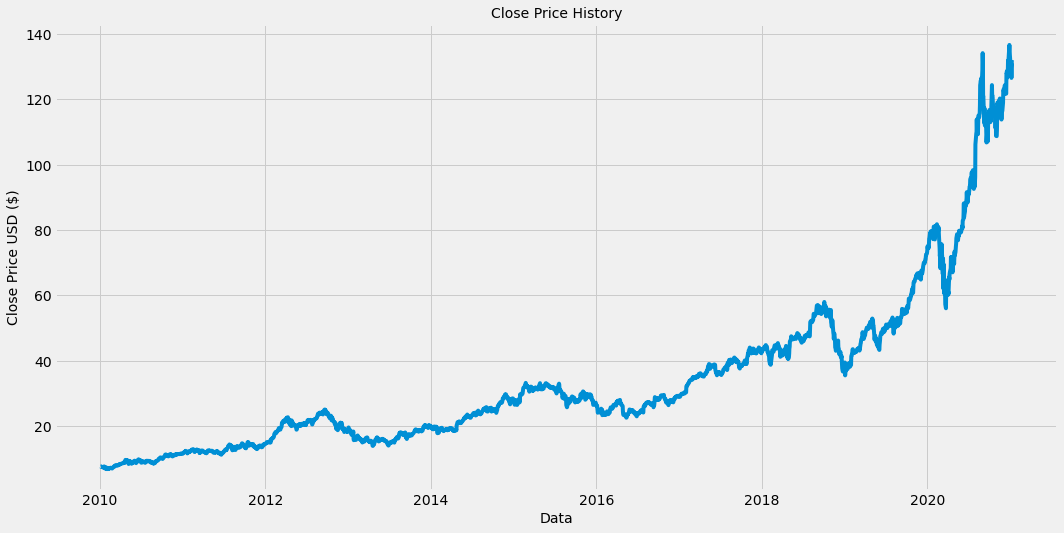

In [15]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History', fontsize=14)
plt.plot(data['Close'])
plt.xlabel('Data', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.show()